In [1]:
import  os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'svg.fonttype': 'none'})
sns.set_context('notebook', rc={'font.size':9,
                                'axes.titlesize':9,
                                'axes.labelsize':9,
                                'legend.fontsize': 9,
                                'xtick.labelsize':9,
                                'ytick.labelsize':9})

In [3]:
def get_answer(filename):
    with open(filename) as f:
        return f.read()[0]

correct_answers = [get_answer(f"survey/questions/{q}/true.txt") for q in sorted(os.listdir("survey/questions"), key=int)]
correct_answers

['a', 'e', 'd', 'b', 'c', 'e', 'a', 'a', 'a', 'd']

In [4]:
df = pd.read_excel('survey/results.xls')

In [5]:
orderings = [[ordering.split(';')[:-1] for ordering in answers] 
             for answers in df[[str(i+1) for i in range(len(correct_answers))]].values.T]

correct_positions = [[ordering.index(correct_answers[i])+1 for ordering in question] for i, question in enumerate(orderings)]

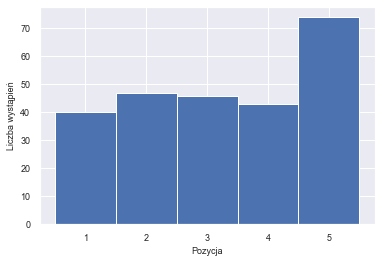

In [7]:
overall = [position for question in correct_positions for position in question]
d = np.diff(np.unique(overall)).min()
left_of_first_bin = min(overall) - float(d)/2
right_of_last_bin = max(overall) + float(d)/2
_ = plt.hist(overall, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.xlabel("Pozycja")
plt.ylabel("Liczba wystąpień")
plt.gcf().patch.set_alpha(0.0)